# Gaussian Naive Bayes on Pima Indians Diabetes Dataset

[Dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Data/PimaIndians.csv)

[EDA on dataset](https://github.com/heenalsapovadia/ml_practices_2018/blob/master/Labs/Lab1/Heenal/Python\Notebooks/PimaIndians\Diabetes.ipynb)

In [1]:
#importing all the necessary libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix,PrecisionRecallCurve

from imblearn.over_sampling import SMOTE

In [2]:
pima = pd.read_csv('../../Lab1/Heenal/Data/PimaIndians.csv')

In [3]:
pima.shape

(392, 9)

In [4]:
# converting the target into numerical values
lb = LabelBinarizer()
pima['test'] = lb.fit_transform(pima['test'].values)


In [5]:
type(pima)

pandas.core.frame.DataFrame

In [12]:
# Separating the data and the target variable

X = pima.drop(['test', 'pregnant', 'diastolic', 'insulin', 'diabetes','bmi', 'triceps'],axis = 1).values
y = pima['test'].values

In [13]:
X.shape, y.shape

((392, 2), (392,))

In [14]:
# Splitting the dataset into TRAIN and TEST sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.shape

(274, 2)

## Visualizing the range of values of the features selected

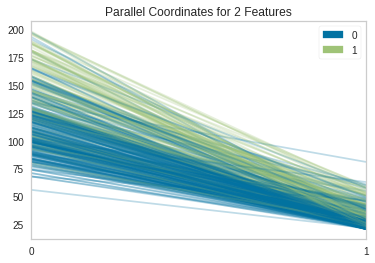

In [16]:
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.poof()

### The range of values is too varied and hence, the features should be scaled or normalized.

In [17]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


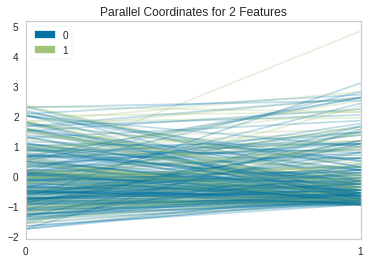

In [18]:
# checking the range again
visualizer = ParallelCoordinates()
visualizer.fit_transform(X_train_std, y)
visualizer.poof()

In [19]:
# Using Gaussian Naive Bayes as the model

gnb = GaussianNB() 
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

### Attempting to plot the decision boundaries

In [21]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')


In [22]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


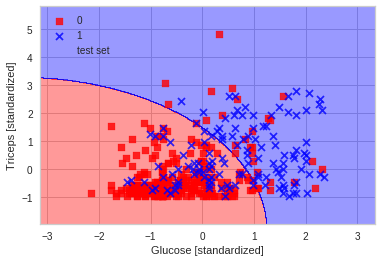

In [23]:
plot_decision_regions(X_combined_std,
                      y_combined, classifier=gnb,
                      test_idx=range(275,392))

plt.xlabel('Glucose [standardized]')
plt.ylabel('Triceps [standardized]')
plt.legend(loc='upper left')
plt.show()


**We observe that there are a lot of overlapping points.**

# Plotting the learning curve using sklearn

In [24]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

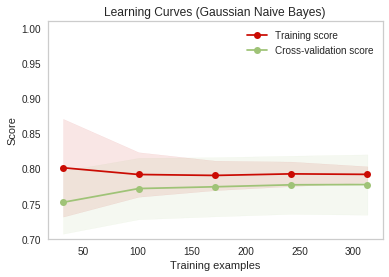

In [25]:
# Plotting for Gaussian Naive Bayes
title = "Learning Curves (Gaussian Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

# Checking out all the metrics

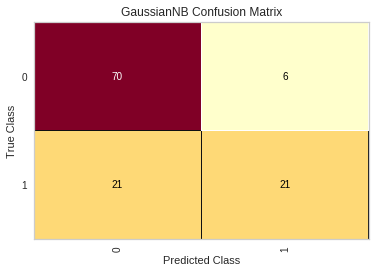

In [26]:
# Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(gnb, classes=[0,1])
cm.score(X_test_std, y_test)
cm.poof()

**The result seems to be more inclined towards class '0' i.e. those not showing signs of Diabetes. There are as many False Negatives as there are True Positives for class '1' i.e. those showing signs of Diabetes.**

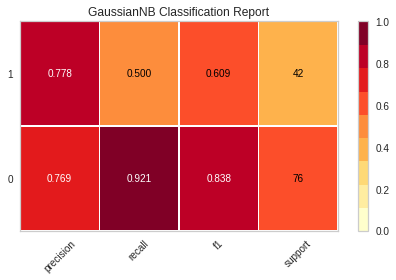

In [27]:
# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(gnb, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()

**A high recall for class '0' indicates the model approximately correctly identifies if there are no signs of diabetes, but, a low recall on class '1' depicts the model is unable to detect diabetes.**

In [28]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0])

In [29]:
# Predicted labels on the TEST set

y_pred = gnb.predict(X_test_std)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0])

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.7711864406779662

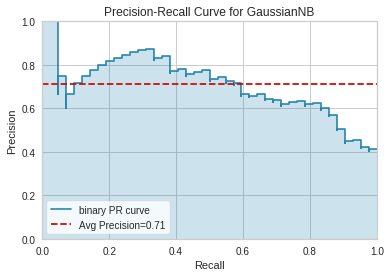

In [31]:
# Plotting the precision-recall curve

viz = classifier.PrecisionRecallCurve(GaussianNB())
viz.fit(X_train_std, y_train)
viz.score(X_test_std, y_test)
viz.poof()


In [32]:
# Sample-wise probability estimates for each class

gnb.predict_proba(X_test_std)

array([[0.58909112, 0.41090888],
       [0.06170793, 0.93829207],
       [0.92367354, 0.07632646],
       [0.67716047, 0.32283953],
       [0.92010633, 0.07989367],
       [0.30198114, 0.69801886],
       [0.90618833, 0.09381167],
       [0.92390119, 0.07609881],
       [0.10254429, 0.89745571],
       [0.05620823, 0.94379177],
       [0.94623245, 0.05376755],
       [0.76461839, 0.23538161],
       [0.93734423, 0.06265577],
       [0.81514698, 0.18485302],
       [0.70772374, 0.29227626],
       [0.98156108, 0.01843892],
       [0.83693886, 0.16306114],
       [0.94623245, 0.05376755],
       [0.96938101, 0.03061899],
       [0.90434619, 0.09565381],
       [0.93572104, 0.06427896],
       [0.61750239, 0.38249761],
       [0.88495146, 0.11504854],
       [0.9265074 , 0.0734926 ],
       [0.96088958, 0.03911042],
       [0.43949256, 0.56050744],
       [0.92894784, 0.07105216],
       [0.96318548, 0.03681452],
       [0.95104782, 0.04895218],
       [0.94439215, 0.05560785],
       [0.

In [33]:
# mean accuracy
gnb.score(X_test_std, y_test)

0.7711864406779662

In [34]:
# Number of samples accurately classified
metrics.accuracy_score(y_test, y_pred, normalize=False)

91

In [35]:
# LOG loss
metrics.log_loss(y_test, y_pred)

7.902981019043811

# Trying to solve the imbalance in data
```
This approach is considered because of the imbalance in dataset. There are only 33% of diabetic patients in the dataset and hence, less enough for the model to learn and detect signs of diabetes.

There are many approaches to solve imbalance in dataset:
1. Undersampling the majority class
2. Oversampling the minority class
3. SMOTE : Synthetic Minority Oversampling technique

We implement the 3rd one as it involves generation of new data rather than just copying the available data as in 2nd method or losing information as in 1st method. 

```

In [36]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (274, 2)
Number transactions y_train dataset:  (274,)
Number transactions X_test dataset:  (118, 2)
Number transactions y_test dataset:  (118,)


In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 88
Before OverSampling, counts of label '0': 186 

After OverSampling, the shape of train_X: (372, 2)
After OverSampling, the shape of train_y: (372,) 

After OverSampling, counts of label '1': 186
After OverSampling, counts of label '0': 186


In [38]:
# Scaling the data

sc = StandardScaler()
sc.fit(X_train_res)

X_train_std_res = sc.transform(X_train_res)
X_test_std = sc.transform(X_test)

/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/heenal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
# modelling
gnb = GaussianNB()
gnb.fit(X_train_std_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
gnb.score(X_test_std, y_test)

0.7627118644067796

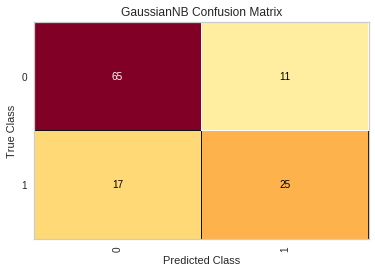

In [41]:
cm = ConfusionMatrix(gnb, classes=[0,1])
cm.score(X_test_std, y_test)
cm.poof()

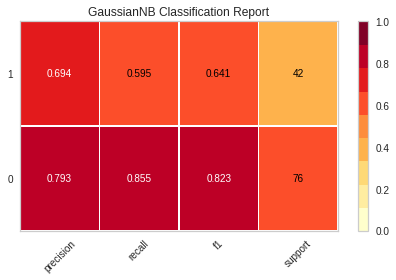

In [42]:
visualizer = ClassificationReport(gnb, support=True)

visualizer.fit(X_train_std_res, y_train_res)
visualizer.score(X_test_std, y_test)
visualizer.poof()

**We observe that the recall for class '1' has improved a bit after generation of more data.**

# Plotting the validation curve

In [43]:
train_scores, valid_scores = validation_curve(GaussianNB(), X, y, "var_smoothing", np.logspace(-7, 3, 3), cv=5, n_jobs=4)

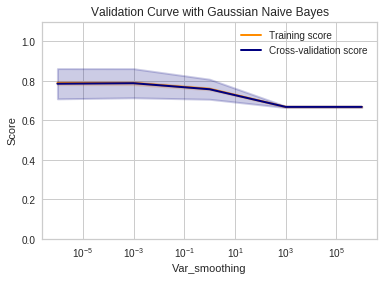

In [45]:
param_range = np.logspace(-6, 6, 5)
train_scores, test_scores = validation_curve( GaussianNB(), X, y, param_name="var_smoothing", param_range=param_range, cv=10, scoring="accuracy", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Gaussian Naive Bayes")
plt.xlabel("Var_smoothing")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
